# Some dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../shared_data/round1/'
days = [-2, -1, 0]

activity = [pd.read_csv(path + f'prices_round_1_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['day', 'timestamp'], inplace=True)
activity

product  bid_price_1  bid_volume_1  bid_price_2  \
day timestamp                                                      
-2  0          AMETHYSTS         9996             1       9995.0   
    0          STARFRUIT         4997            26          NaN   
    100        AMETHYSTS        10000             5       9995.0   
    100        STARFRUIT         5000             5       4998.0   
    200        STARFRUIT         4997             1       4996.0   
...                  ...          ...           ...          ...   
 0  999700     STARFRUIT         5053             1       5048.0   
    999800     STARFRUIT         5047            27          NaN   
    999800     AMETHYSTS         9995            27          NaN   
    999900     STARFRUIT         5048             2       5047.0   
    999900     AMETHYSTS         9996             2       9995.0   

               bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
day timestamp                                                         
-2  0                  25.0          NaN           NaN        10004   
    0                   NaN          NaN           NaN         5003   
    100                20.0          NaN           NaN        10005   
    100                 6.0       4997.0          20.0         5004   
    200                30.0          NaN           NaN         5003   
...                     ...          ...           ...          ...   
 0  999700             26.0          NaN           NaN         5054   
    999800              NaN          NaN           NaN         5052   
    999800              NaN          NaN           NaN        10005   
    999900             21.0          NaN           NaN         5054   
    999900             21.0          NaN           NaN        10004   

               ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
day timestamp                                                         
-2  0                     1      10005.0          25.0          NaN   
    0                    26          NaN           NaN          NaN   
    100                  20          NaN           NaN          NaN   
    100                  20          NaN           NaN          NaN   
    200                  31          NaN           NaN          NaN   
...                     ...          ...           ...          ...   
 0  999700                2       5055.0          24.0          NaN   
    999800                1       5054.0          27.0          NaN   
    999800               27          NaN           NaN          NaN   
    999900               23          NaN           NaN          NaN   
    999900                2      10005.0          21.0          NaN   

               ask_volume_3  mid_price  profit_and_loss  
day timestamp                                            
-2  0                   NaN    10000.0              0.0  
    0                   NaN     5000.0              0.0  
    100                 NaN    10002.5              0.0  
    100                 NaN     5002.0              0.0  
    200                 NaN     5000.0              0.0  
...                     ...        ...              ...  
 0  999700              NaN     5053.5              0.0  
    999800              NaN     5049.5              0.0  
    999800              NaN    10000.0              0.0  
    999900              NaN     5051.0              0.0  
    999900              NaN    10000.0              0.0  

[60000 rows x 15 columns]

In [3]:
activity.isna().sum()

product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        26408
bid_volume_2       26408
bid_price_3        53602
bid_volume_3       53602
ask_price_1            0
ask_volume_1           0
ask_price_2        26994
ask_volume_2       26994
ask_price_3        53324
ask_volume_3       53324
mid_price              0
profit_and_loss        0
dtype: int64

In [4]:
trade = [pd.read_csv(path + f'trades_round_1_day_{d}_nn.csv', sep=';', ).assign(day=d) for d in days]
trade = pd.concat(trade)
trade.set_index(['day', 'timestamp'], inplace=True)
trade

buyer  seller     symbol   currency    price  quantity
day timestamp                                                        
-2  0            NaN     NaN  AMETHYSTS  SEASHELLS   9996.0         1
    0            NaN     NaN  STARFRUIT  SEASHELLS   5003.0         1
    0            NaN     NaN  AMETHYSTS  SEASHELLS   9996.0         1
    100          NaN     NaN  STARFRUIT  SEASHELLS   5004.0         6
    900          NaN     NaN  STARFRUIT  SEASHELLS   5001.0         2
...              ...     ...        ...        ...      ...       ...
 0  998800       NaN     NaN  STARFRUIT  SEASHELLS   5050.0         1
    998800       NaN     NaN  AMETHYSTS  SEASHELLS  10002.0         1
    999500       NaN     NaN  AMETHYSTS  SEASHELLS   9995.0         2
    999500       NaN     NaN  STARFRUIT  SEASHELLS   5049.0         2
    999600       NaN     NaN  STARFRUIT  SEASHELLS   5048.0         1

[16150 rows x 6 columns]

In [5]:
trade.isna().sum()

buyer       16150
seller      16150
symbol          0
currency        0
price           0
quantity        0
dtype: int64

# Split the data to prepare the backtester

From the log file generated by the prosperity server, it seems that the algorithm was tested on day-0 data with first 1000 iterations.
Then to get a result from the backtester that is comparable with the prosperity server, we need to prepare a small dataset with the same data for the backtester.
In principle, the server should generate higher profit than the backtester because of the hidden orders.

For convenience, the small dataset is named as `round6` data although there is no round 6 in the competition.
This naming is just for facilitating the testing - if we want to test on the small subset and compare with the server results, we simply specify the round to be 6 to the backtester and provide the path to the `shared_data` folder.

In [6]:
activity_small = activity[(activity.index.get_level_values(0) == 0) & (activity.index.get_level_values(1) < 100_000)].reset_index()
activity_small.to_csv('../shared_data/round6/prices_round_6_day_0.csv', sep=';', index=False, float_format='%g')

In [7]:
activity_small

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,99700,AMETHYSTS,10002,1,9998.0,1.0,9996.0,1.0,10004,1,10005.0,28.0,NaN,NaN,10003.0,0.0
1996,0,99800,AMETHYSTS,9998,3,9996.0,1.0,9995.0,25.0,10004,1,10005.0,25.0,NaN,NaN,10001.0,0.0
1997,0,99800,STARFRUIT,5050,25,NaN,NaN,NaN,NaN,5052,3,5057.0,26.0,NaN,NaN,5051.0,0.0
1998,0,99900,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0


In [8]:
trade_small = trade[(trade.index.get_level_values(0) == 0) & (trade.index.get_level_values(1) < 100_000)].reset_index().drop(columns=['day'], inplace=False)
trade_small.to_csv('../shared_data/round6/trades_round_6_day_0_nn.csv', sep=';', index=False, float_format='%g')

In [9]:
trade_small

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,STARFRUIT,SEASHELLS,5041.0,4
1,100,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
2,300,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,2
3,300,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1
4,300,NaN,NaN,STARFRUIT,SEASHELLS,5037.0,6
...,...,...,...,...,...,...,...
587,98900,NaN,NaN,STARFRUIT,SEASHELLS,5055.0,4
588,99400,NaN,NaN,STARFRUIT,SEASHELLS,5055.0,1
589,99800,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1
590,99800,NaN,NaN,STARFRUIT,SEASHELLS,5051.0,1


# Visualize the trades

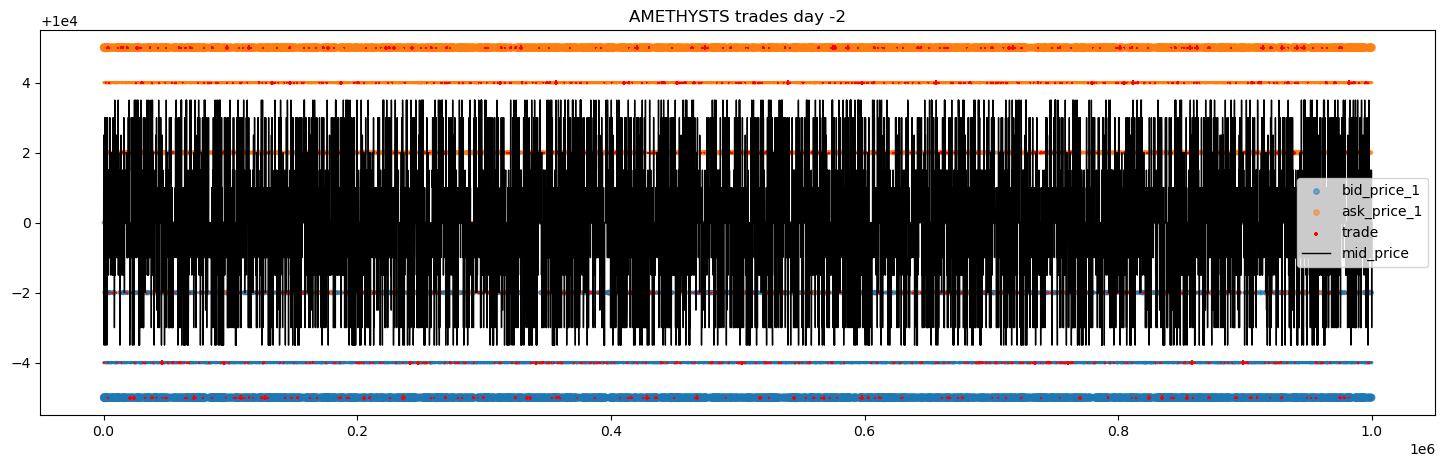

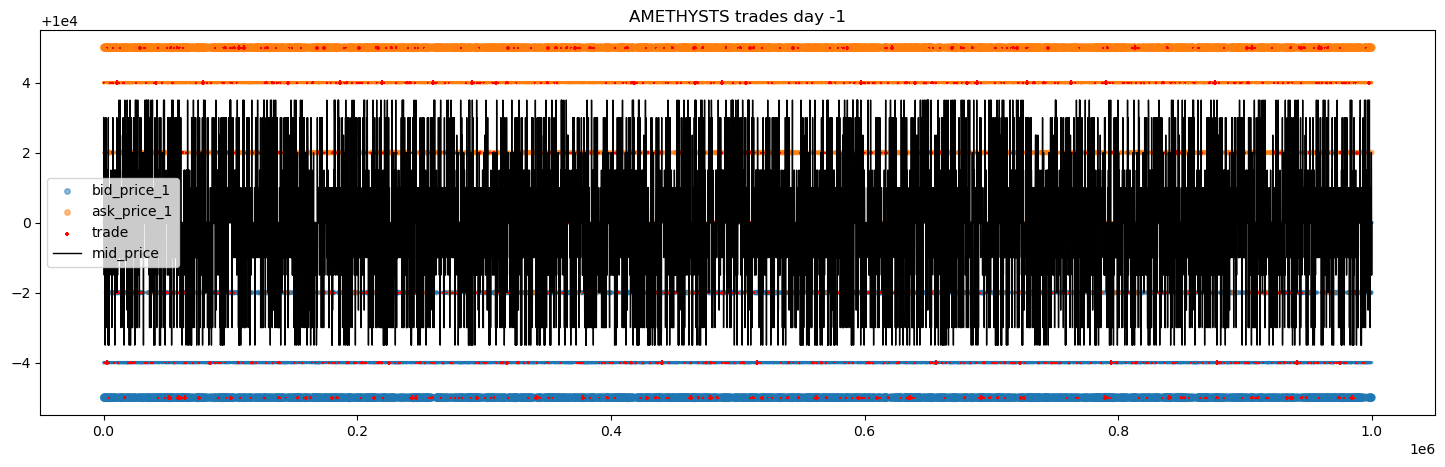

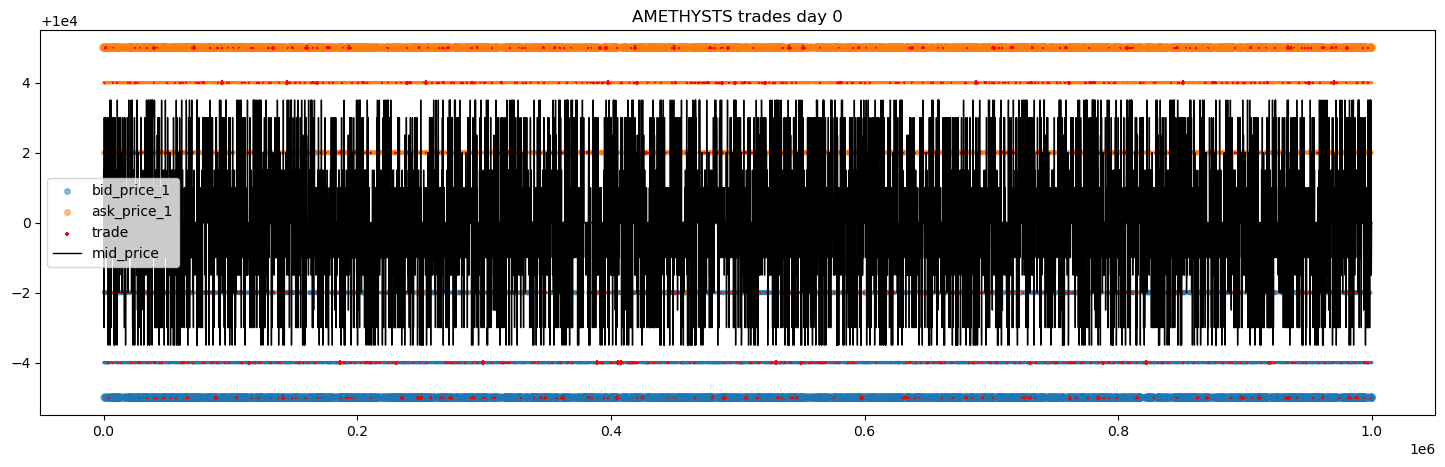

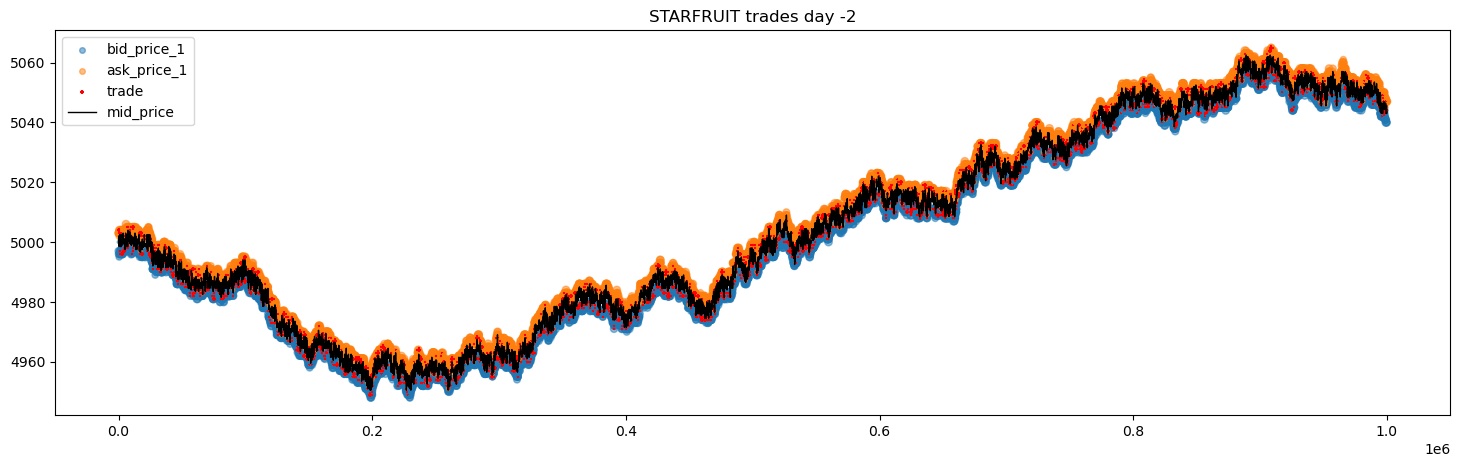

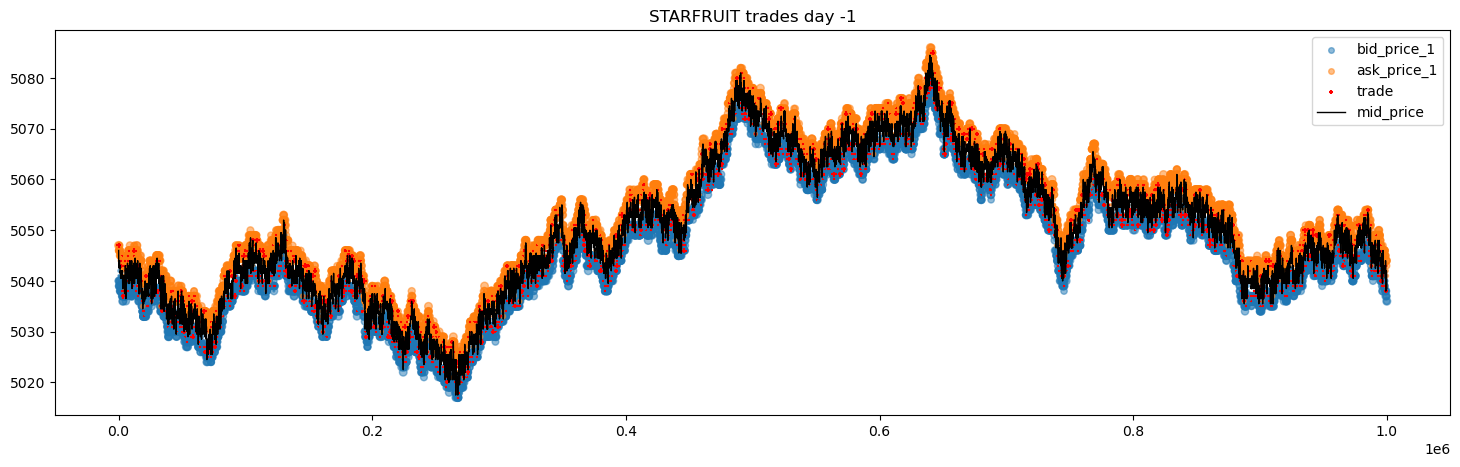

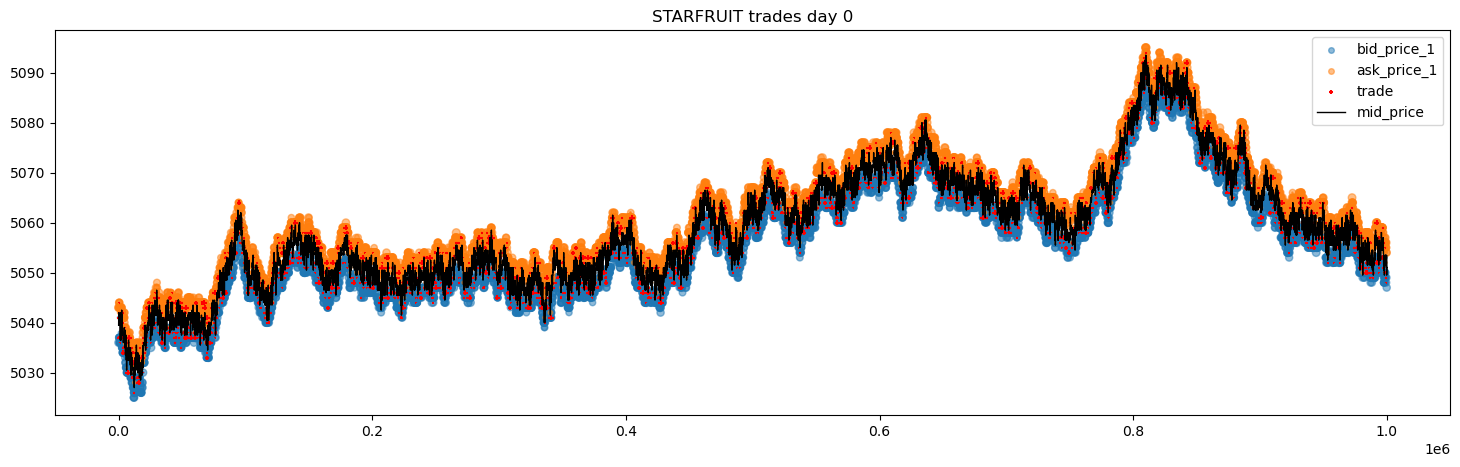

In [10]:
products = activity['product'].unique()

for product in products:
    for d in days:
        product_trade = trade[(trade.index.get_level_values(0) == d) & (trade.symbol == product)].reset_index()
        product_activity = activity[(activity['product'] == product) & (activity.index.get_level_values(0) == d)].reset_index()

        plt.figure(figsize=(18, 5))
        plt.scatter(product_activity['timestamp'], product_activity['bid_price_1'], label='bid_price_1', s=product_activity['bid_volume_1'], alpha=0.5)
        plt.scatter(product_activity['timestamp'], product_activity['ask_price_1'], label='ask_price_1', s=product_activity['ask_volume_1'], alpha=0.5)
        plt.scatter(product_trade.timestamp, product_trade.price, s=product_trade.quantity, label='trade', c='red', marker='+')
        plt.plot(product_activity['timestamp'], product_activity['mid_price'], label='mid_price', c='black', linewidth=1)
        plt.legend()
        plt.title(f'{product} trades day {d}')
        plt.show()

# Visualize `AMETHYSTS` statitics

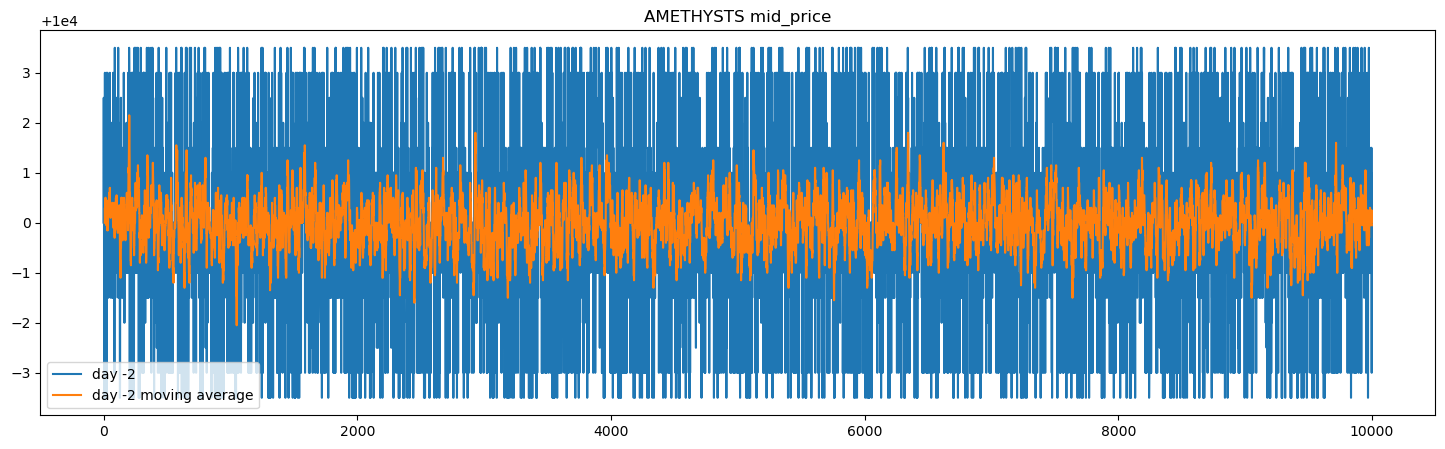

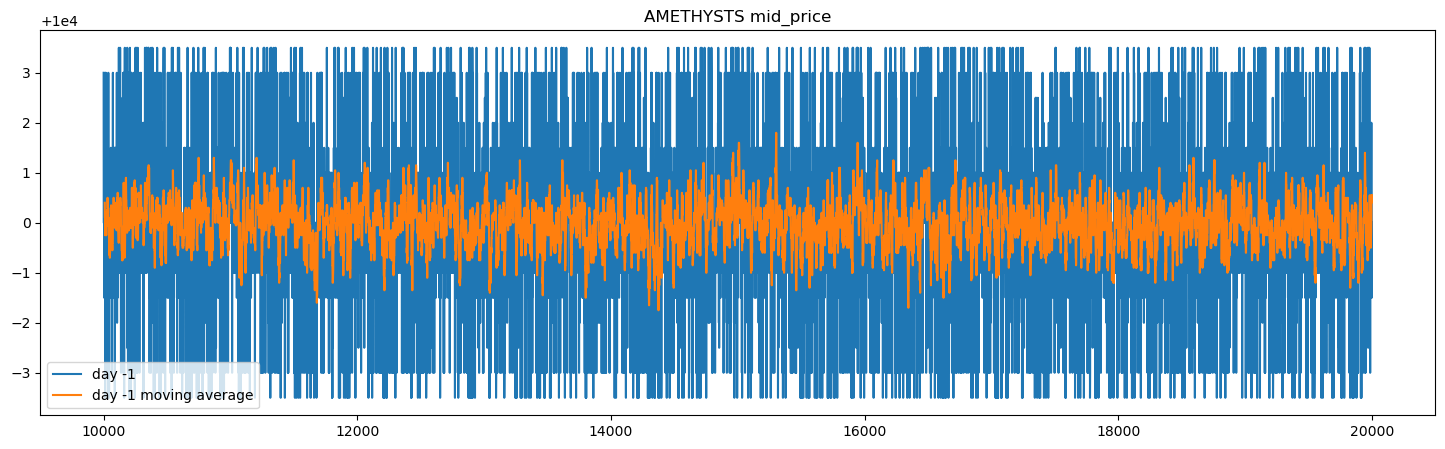

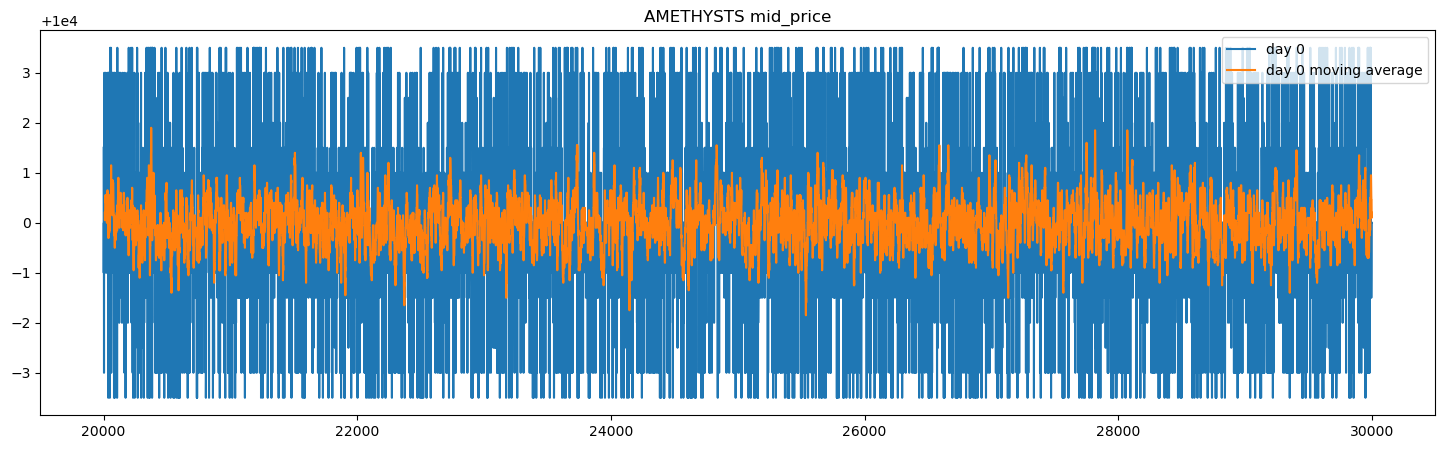

In [11]:
activity_AMET = activity[activity['product'] == 'AMETHYSTS'].reset_index()

for d in days:
    mid_price = activity_AMET[activity_AMET.day == d].mid_price
    moving_average = mid_price.rolling(window=10).mean()
    
    plt.figure(figsize=(18, 5))
    plt.plot(mid_price, label=f'day {d}')
    plt.plot(moving_average, label=f'day {d} moving average')

    plt.legend()
    plt.title('AMETHYSTS mid_price')
    plt.show()

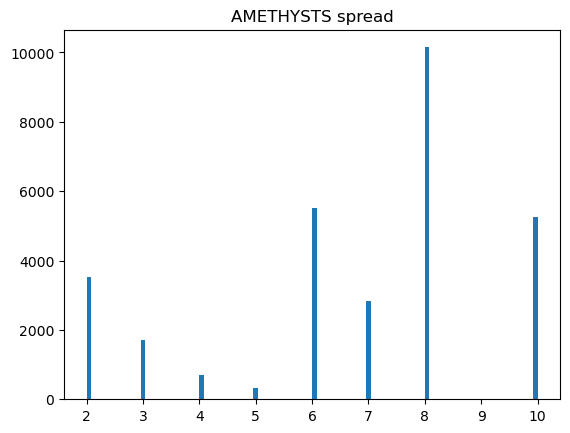

In [12]:
best_bid, best_ask = activity_AMET['bid_price_1'], activity_AMET['ask_price_1']
spread = best_ask - best_bid

plt.hist(spread, bins=100)
plt.title('AMETHYSTS spread')
plt.show()

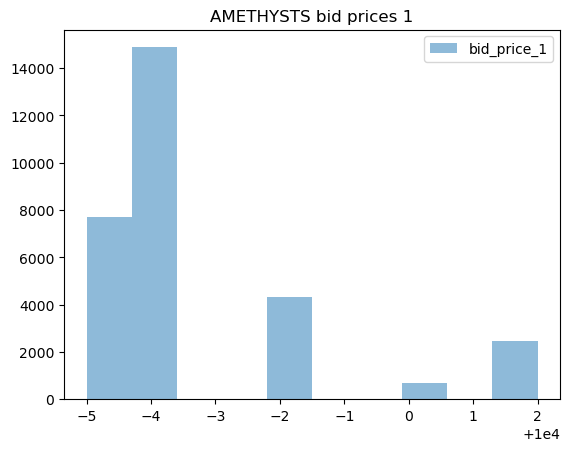

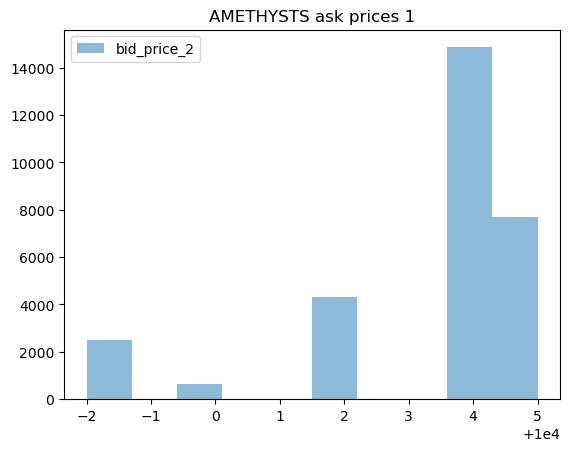

In [13]:
bid_price_1, bid_price_2, bid_price_3 = activity_AMET['bid_price_1'], activity_AMET['bid_price_2'], activity_AMET['bid_price_3']
ask_price_1, ask_price_2, ask_price_3 = activity_AMET['ask_price_1'], activity_AMET['ask_price_2'], activity_AMET['ask_price_3']
bid_volume_1, bid_volume_2, bid_volume_3 = activity_AMET['bid_volume_1'], activity_AMET['bid_volume_2'], activity_AMET['bid_volume_3']
ask_volume_1, ask_volume_2, ask_volume_3 = activity_AMET['ask_volume_1'], activity_AMET['ask_volume_2'], activity_AMET['ask_volume_3']

plt.hist(bid_price_1, alpha=0.5, label='bid_price_1')
plt.legend()
plt.title('AMETHYSTS bid prices 1')
plt.show()

plt.hist(ask_price_1, alpha=0.5, label='bid_price_2')
plt.legend()
plt.title('AMETHYSTS ask prices 1')
plt.show()

In [14]:
bid_price_1.value_counts()/len(bid_price_1)

bid_price_1
9996     0.496333
9995     0.256300
9998     0.143500
10002    0.081733
10000    0.022133
Name: count, dtype: float64

In [15]:
ask_price_1.value_counts()/len(ask_price_1)

ask_price_1
10004    0.495800
10005    0.256267
10002    0.143267
9998     0.083800
10000    0.020867
Name: count, dtype: float64

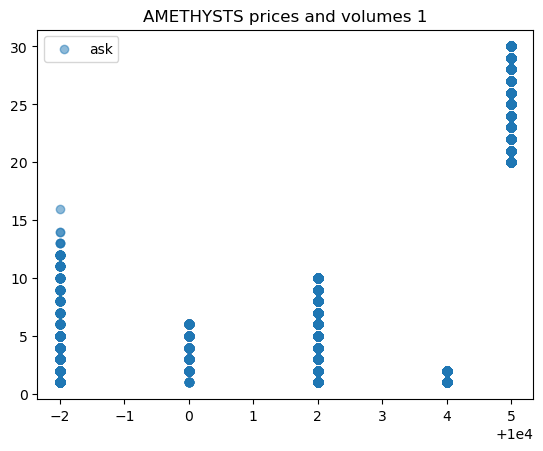

In [16]:
plt.scatter(ask_price_1, ask_volume_1, label='ask', alpha=0.5)
plt.legend()
plt.title('AMETHYSTS prices and volumes 1')
plt.show()

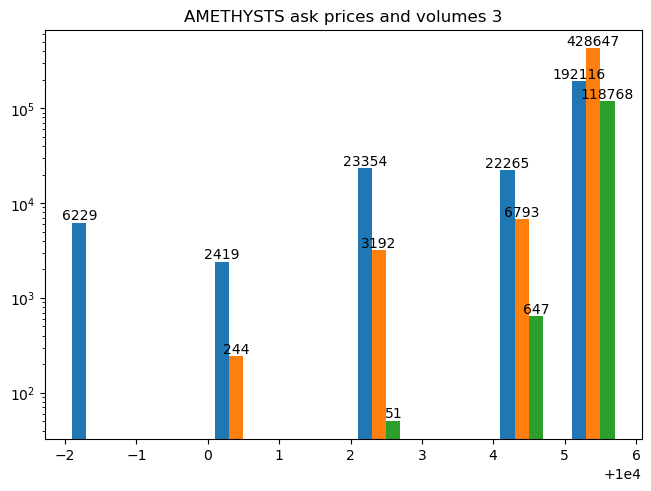

In [17]:
fig, ax = plt.subplots(layout='constrained')
for i in range(1, 4):
    offset = 0.2 * i
    data = activity_AMET.groupby(f'ask_price_{i}')[f'ask_volume_{i}'].sum()
    
    rec = ax.bar(data.index + offset, data.values, width=0.2, label=f'ask {i}')
    ax.bar_label(rec)
    plt.yscale('log')

plt.title(f'AMETHYSTS ask prices and volumes {i}')
plt.show()

In [18]:
activity_AMET.groupby('bid_price_1').bid_volume_1.sum()

bid_price_1
9995     192179
9996      22356
9998      23255
10000      2646
10002      6132
Name: bid_volume_1, dtype: int64

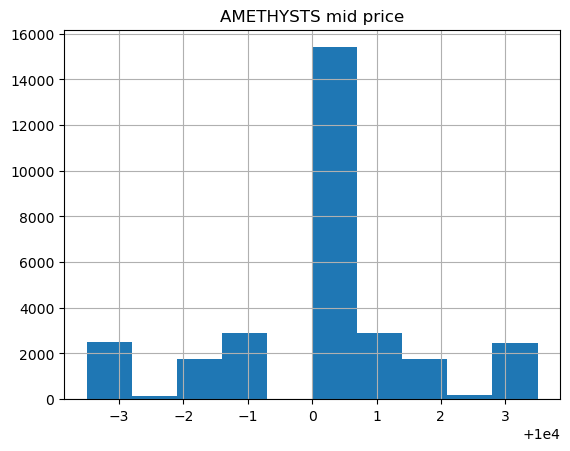

In [19]:
activity_AMET.mid_price.hist()
plt.title('AMETHYSTS mid price')
plt.show()

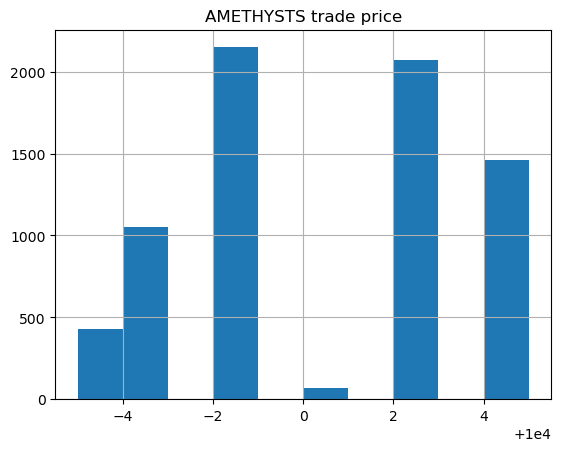

In [30]:
trade_AMET = trade[trade.symbol == 'AMETHYSTS'].reset_index()
trade_AMET.price.hist()
plt.title('AMETHYSTS trade price')
plt.show()

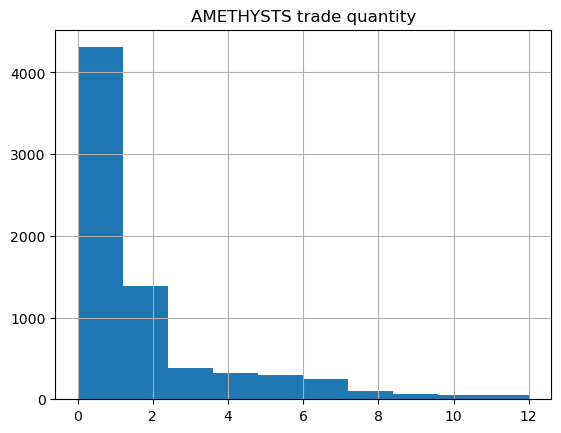

In [32]:
trade_AMET.quantity.hist()
plt.title('AMETHYSTS trade quantity')
plt.show()

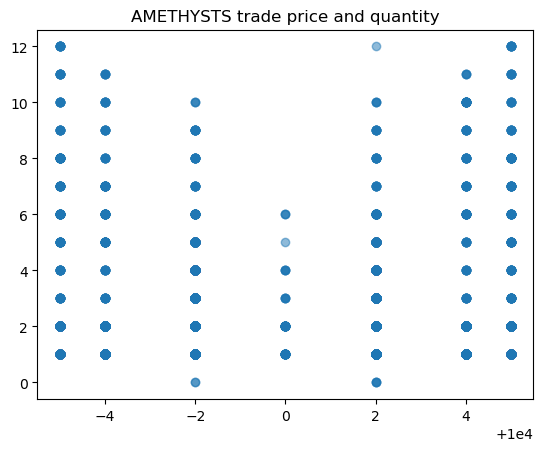

In [33]:
plt.scatter(trade_AMET.price, trade_AMET.quantity, alpha=0.5)
plt.title('AMETHYSTS trade price and quantity')
plt.show()

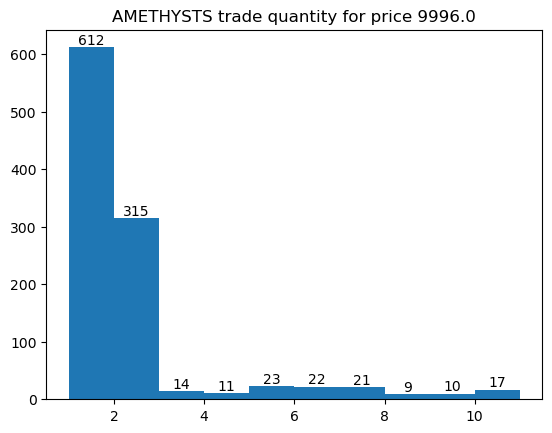

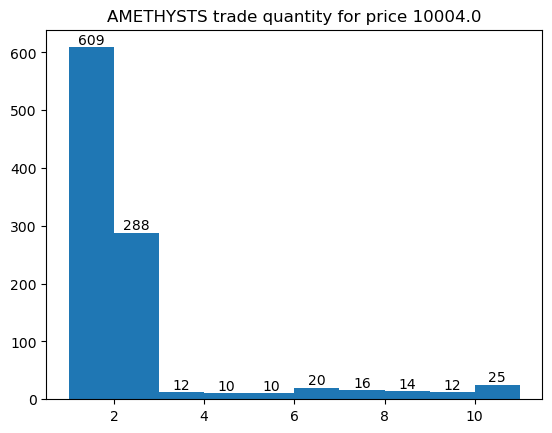

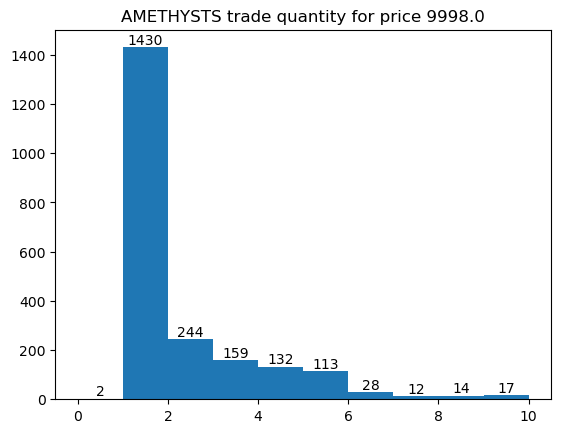

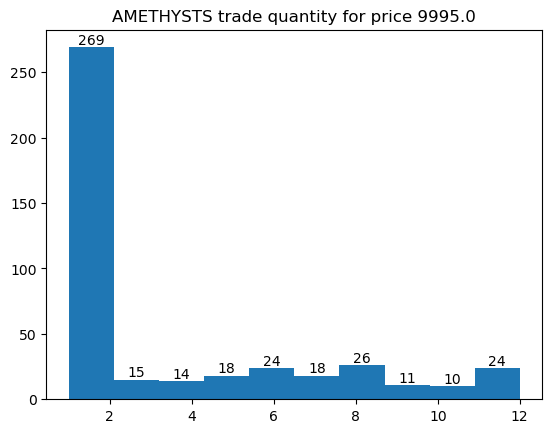

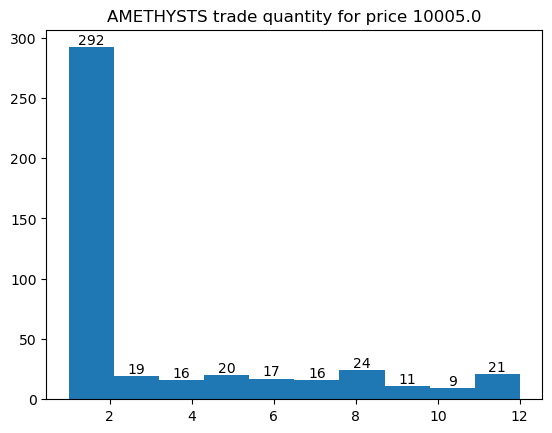

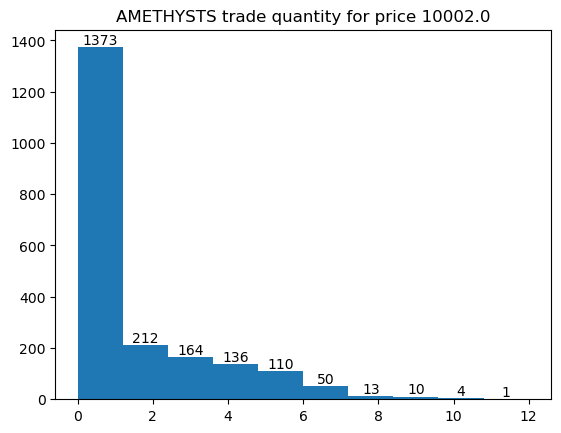

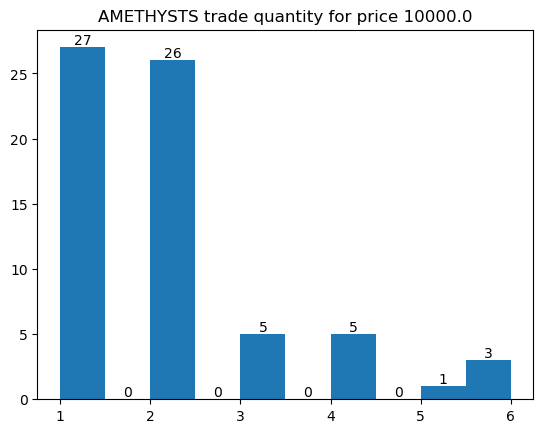

In [52]:
for price in trade_AMET.price.unique():
    values, bins, bars = plt.hist(trade_AMET[trade_AMET.price == price].quantity)
    plt.bar_label(bars)
    plt.title(f'AMETHYSTS trade quantity for price {price}')
    plt.show()

In [ ]:
vals_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
vals_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

profit = 0
for v1 in vals_1:
    for v2 in vals_2:
        max(trade_AMET[trade_AMET.price == 10002].quantity, v1)

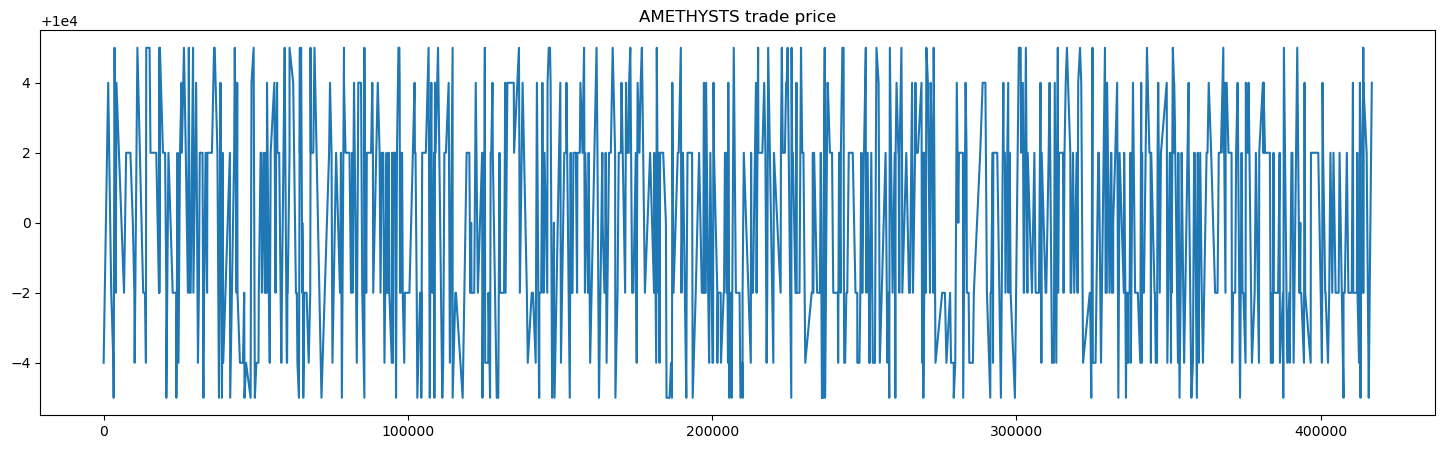

In [35]:
sample_length = 1000

plt.figure(figsize=(18, 5))
plt.plot(trade_AMET.timestamp[:sample_length], trade_AMET.price[:sample_length])
plt.title('AMETHYSTS trade price')
plt.show()

In [42]:
data = trade_AMET.groupby('price').quantity.sum()
data

price
9995.0     1558
9996.0     2061
9998.0     4008
10000.0     137
10002.0    3934
10004.0    2017
10005.0    1512
Name: quantity, dtype: int64

In [45]:
len(trade_AMET) / len(activity_AMET)

0.24116666666666667

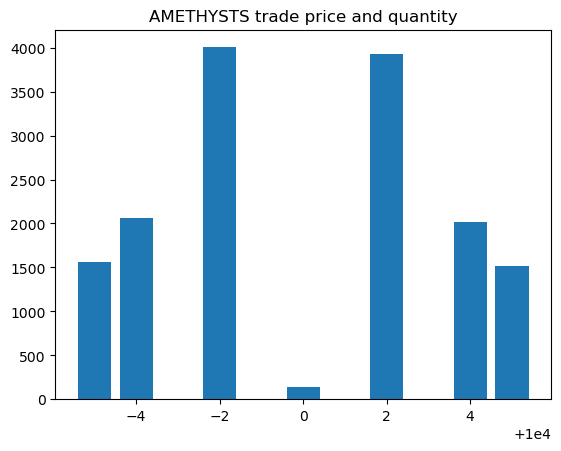

In [43]:
plt.bar(data.index, data.values)
plt.title('AMETHYSTS trade price and quantity')
plt.show()

# Visualize `STARFRUIT` statistics

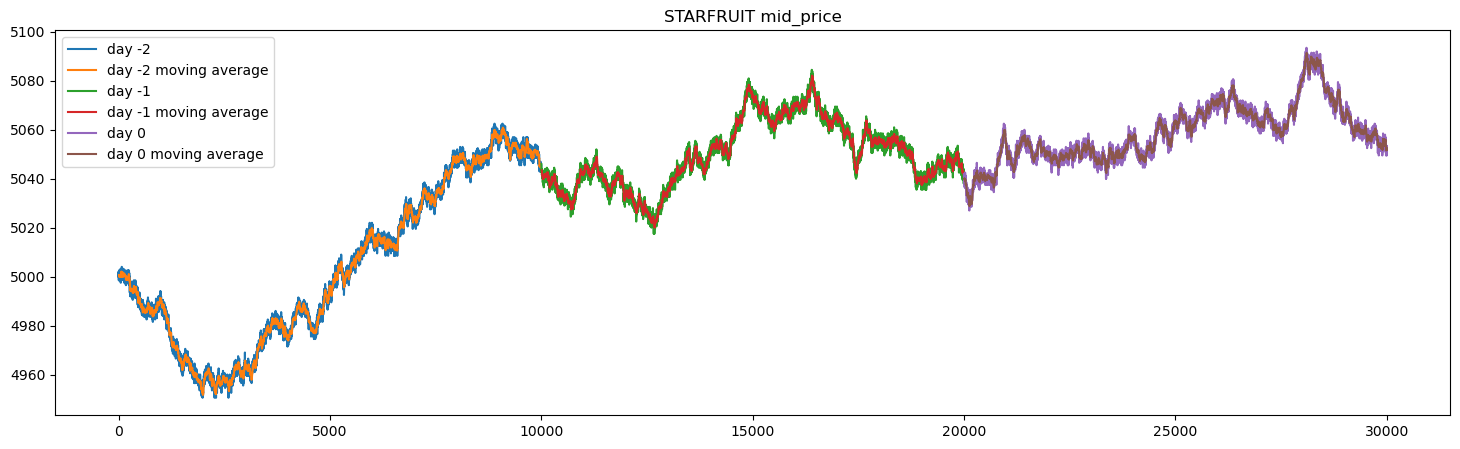

In [20]:
activity_STAR = activity[activity['product'] == 'STARFRUIT'].reset_index()

plt.figure(figsize=(18, 5))
for d in days:
    mid_price = activity_STAR.mid_price[activity_STAR.day == d]
    moving_average = mid_price.rolling(window=10).mean()

    plt.plot(mid_price, label=f'day {d}')
    plt.plot(moving_average, label=f'day {d} moving average')

plt.legend()
plt.title('STARFRUIT mid_price')
plt.show()

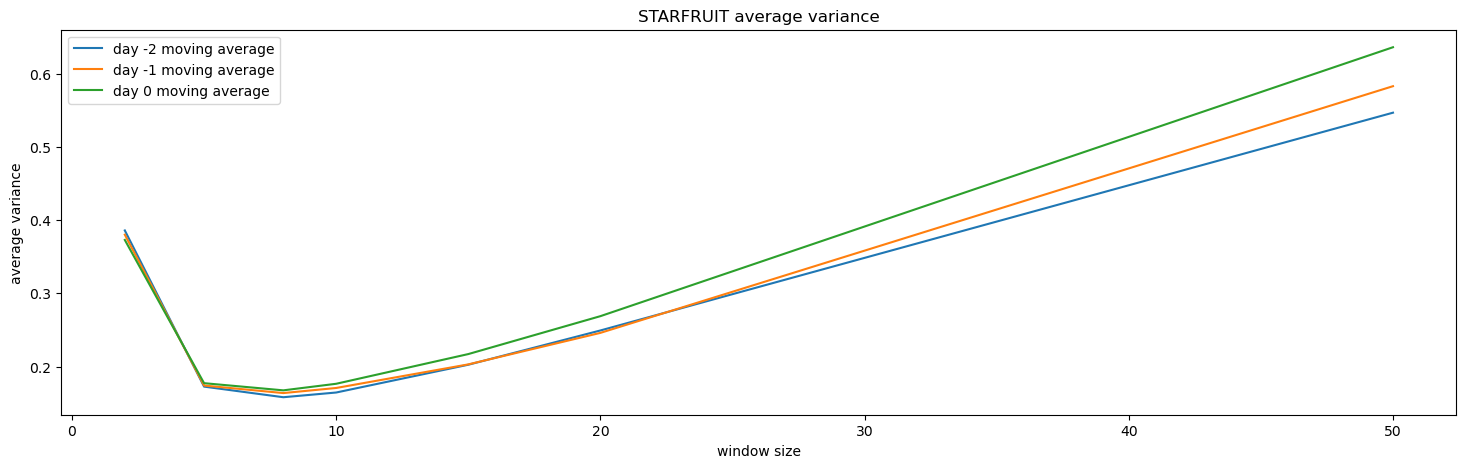

In [21]:
windows = [1, 2, 5, 8, 10, 15, 20, 50]

res_var = {d: [] for d in days}
avg_var = {d: [] for d in days}

for d in days:
    for window in windows:
        mid_price = activity_STAR[activity_STAR.day == d].mid_price
        moving_average = mid_price.rolling(window=window).mean()
        res_var[d].append((mid_price - moving_average).var())
        avg_var[d].append((moving_average.rolling(window=window).var().mean()))

plt.figure(figsize=(18, 5))
for d in days:
    plt.plot(windows, avg_var[d], label=f'day {d} moving average')

plt.xlabel('window size')
plt.ylabel('average variance')
plt.legend()
plt.title('STARFRUIT average variance')
plt.show()

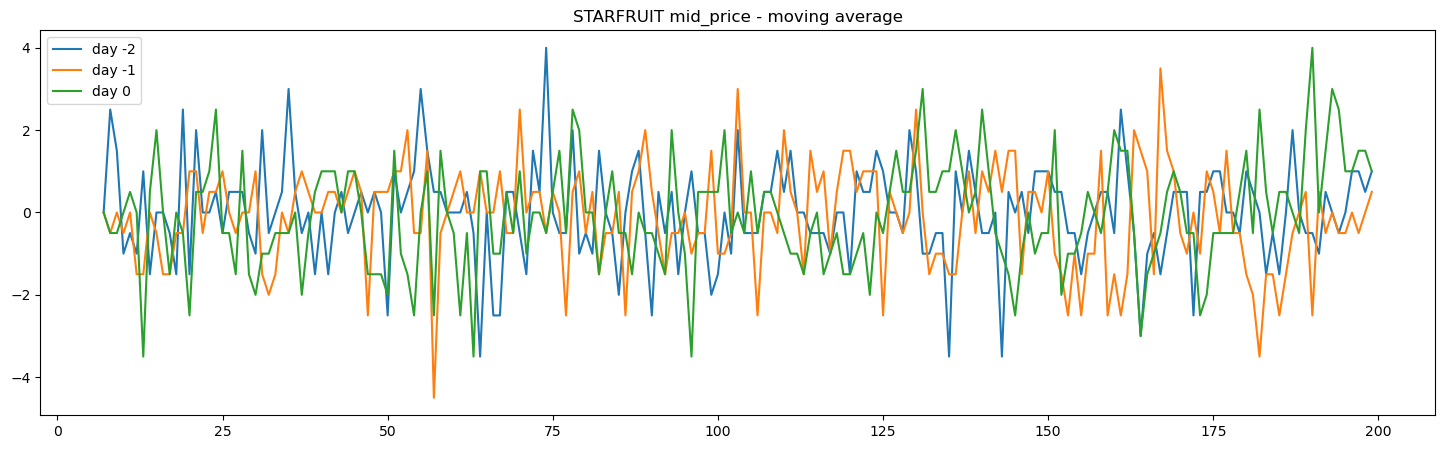

In [22]:
window_size = 8

plt.figure(figsize=(18, 5))
for d in days:
    mid_price = activity_STAR[activity_STAR.day == d].mid_price
    moving_average = round(mid_price.rolling(window=window_size).mean())
    data = (mid_price - moving_average).values

    plt.plot(data[:200], label=f'day {d}')

plt.legend()
plt.title('STARFRUIT mid_price - moving average')
plt.show()

In [23]:
moving_average = round(activity_STAR['mid_price'].rolling(window=window_size).mean())
diff = activity_STAR['mid_price'] - moving_average
diff.head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     0.0
8     2.5
9     1.5
10   -1.0
11   -0.5
12   -1.0
13    1.0
14   -1.5
15    0.0
16    0.0
17   -0.5
18   -1.5
19    2.5
Name: mid_price, dtype: float64

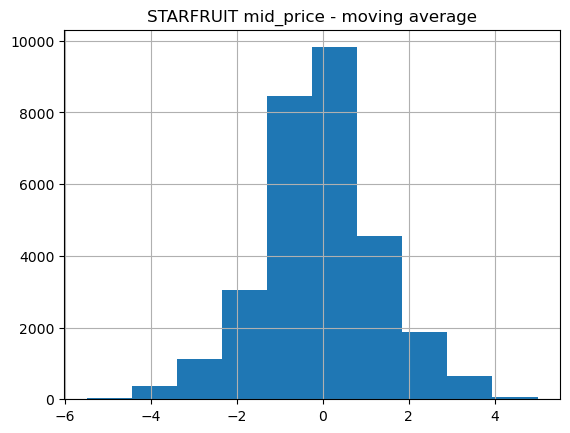

In [24]:
diff.hist()
plt.title('STARFRUIT mid_price - moving average')
plt.show()

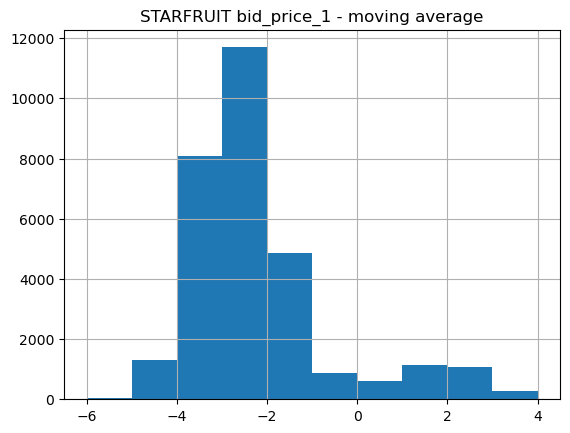

In [25]:
(activity_STAR.bid_price_1 - moving_average).hist()
plt.title('STARFRUIT bid_price_1 - moving average')
plt.show()

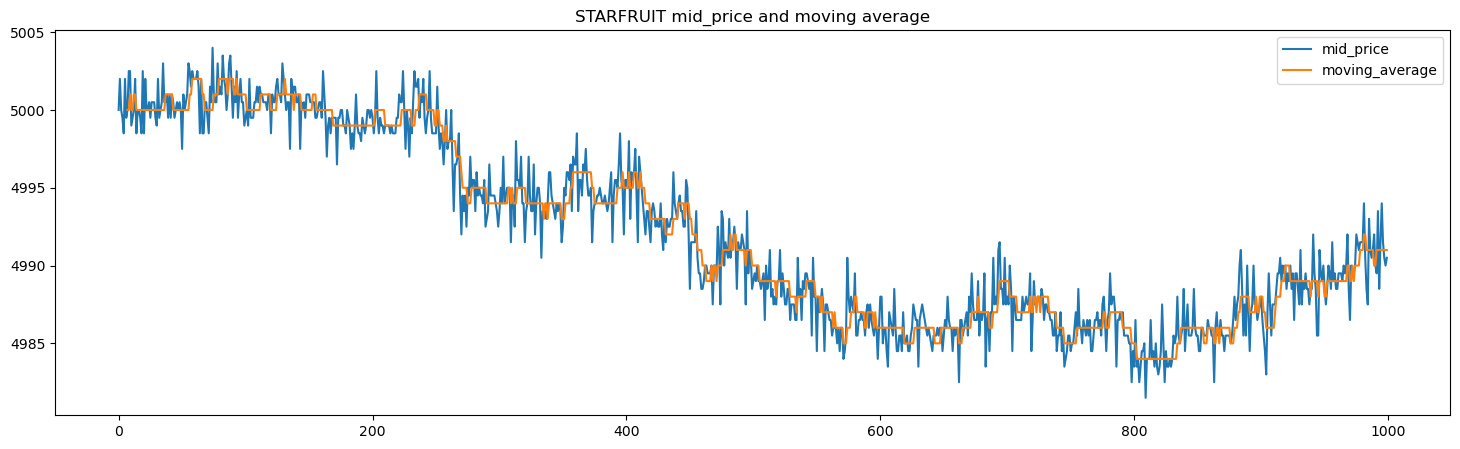

In [26]:
sample_length = 1000

plt.figure(figsize=(18, 5))
plt.plot(activity_STAR['mid_price'][:sample_length], label='mid_price')
plt.plot(moving_average[:sample_length], label='moving_average')
plt.legend()
plt.title('STARFRUIT mid_price and moving average')
plt.show()